In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# I import my package:

import averagedistorsion as ad

In [3]:
rules = [
    ad.plurality(), 
    ad.veto(), 
    ad.stv(), 
    ad.halfApproval(), 
    ad.harmonic(),
    ad.schulze(),
    ad.rankedPairs(),
    ad.copeland(),
    ad.maximin(),
    ad.borda()
]

In [4]:
def plot_results(max_cand, distortion, accuracy, n_voters, n_candidate, model_name):
    plt.figure(figsize=(20,10))
    for j in range(len(rules)):
        plt.plot(range(max_cand), distortion[j], label=rules[j].name, linewidth=2)
    plt.legend()
    plt.title("%s, m=%i, n=%i"%(model_name, n_candidates, n_voters))
    plt.xlabel("Irrelevant alternatives")
    plt.ylabel("Average distortion")
    plt.ylim(1)
    plt.show()
    plt.figure(figsize=(20,10))
    for j in range(len(rules)):
        plt.plot(range(max_cand), accuracy[j], label=rules[j].name, linewidth=2)
    plt.legend()
    plt.title("%s, m=%i, n=%i"%(model_name, n_candidates, n_voters))
    plt.xlabel("Irrelevant alternatives")
    plt.ylabel("Accuracy")
    plt.show()

# Uniform normalized

In [5]:
res =[]
accuracy = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformNormalized())
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res.append(tab_evol)
    accuracy.append(tab_accuracy)

100%|██████████| 8/8 [00:24<00:00,  3.11s/it]


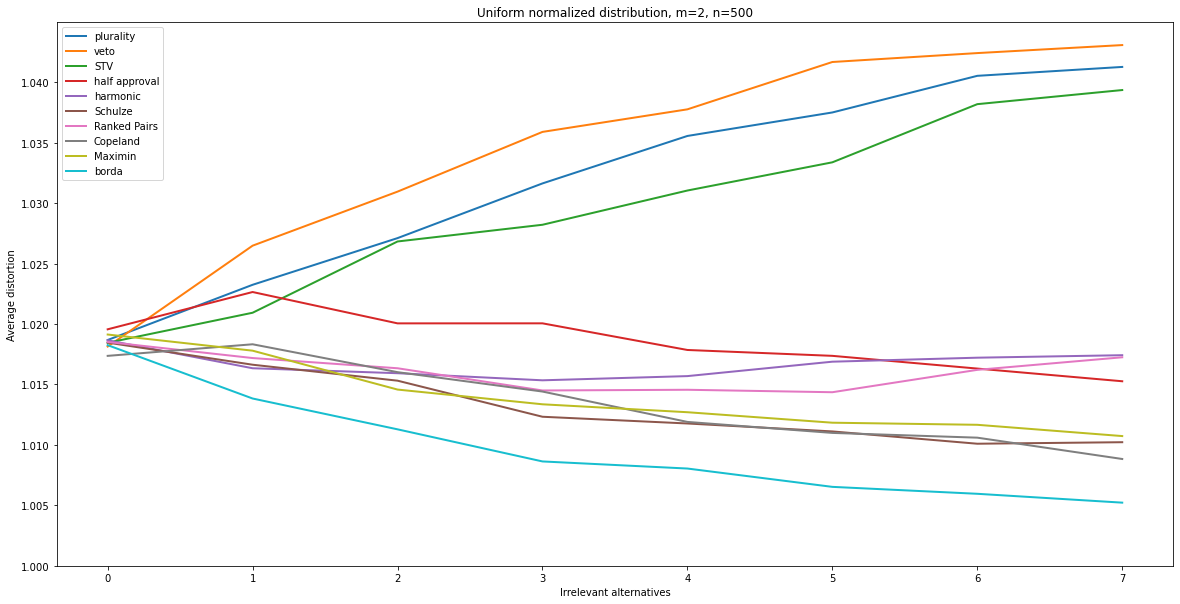

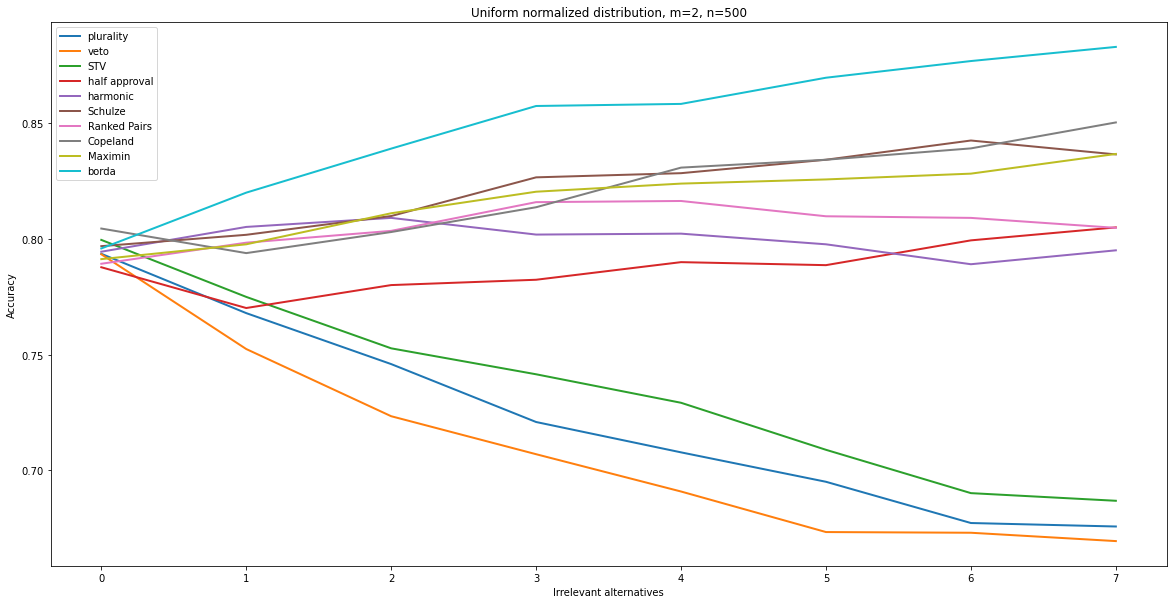

In [19]:
plot_results(max_cand, res, accuracy, n_voters, n_candidates, "Uniform normalized distribution")

## With more voters

In [14]:
res_nbig =[]
accuracy_nbig = []
n_voters = 500 # Voters
n_tries = 1000 # Number of experiments
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformNormalized())
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_nbig.append(tab_evol)
    accuracy_nbig.append(tab_accuracy)

100%|██████████| 8/8 [00:41<00:00,  5.14s/it]


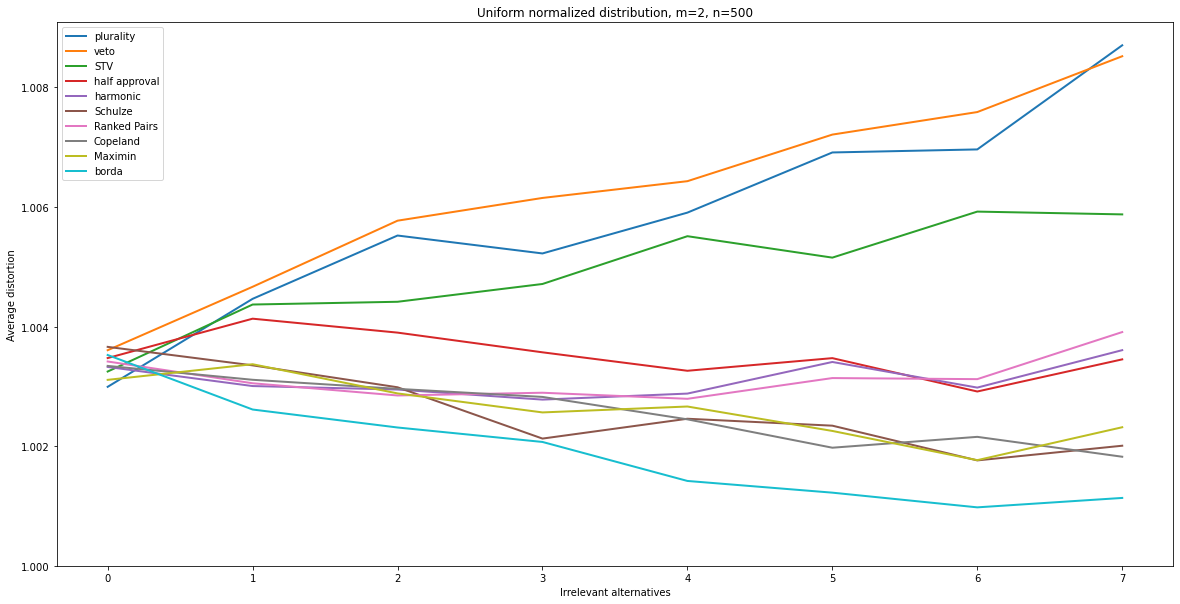

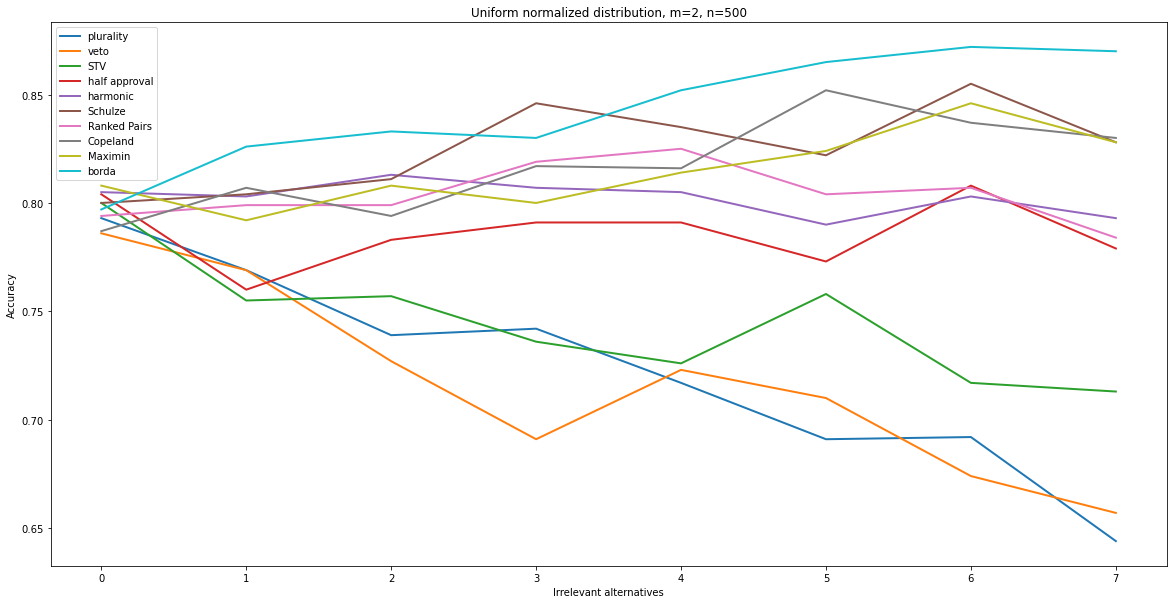

In [18]:
plot_results(max_cand, res_nbig, accuracy_nbig, n_voters, n_candidates, "Uniform normalized distribution")

# Euclidean uniform 1D

In [7]:
res_1d =[]
accuracy_1d = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformEuclidean(dim=1))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_1d.append(tab_evol)
    accuracy_1d.append(tab_accuracy)

100%|██████████| 8/8 [00:49<00:00,  6.15s/it]


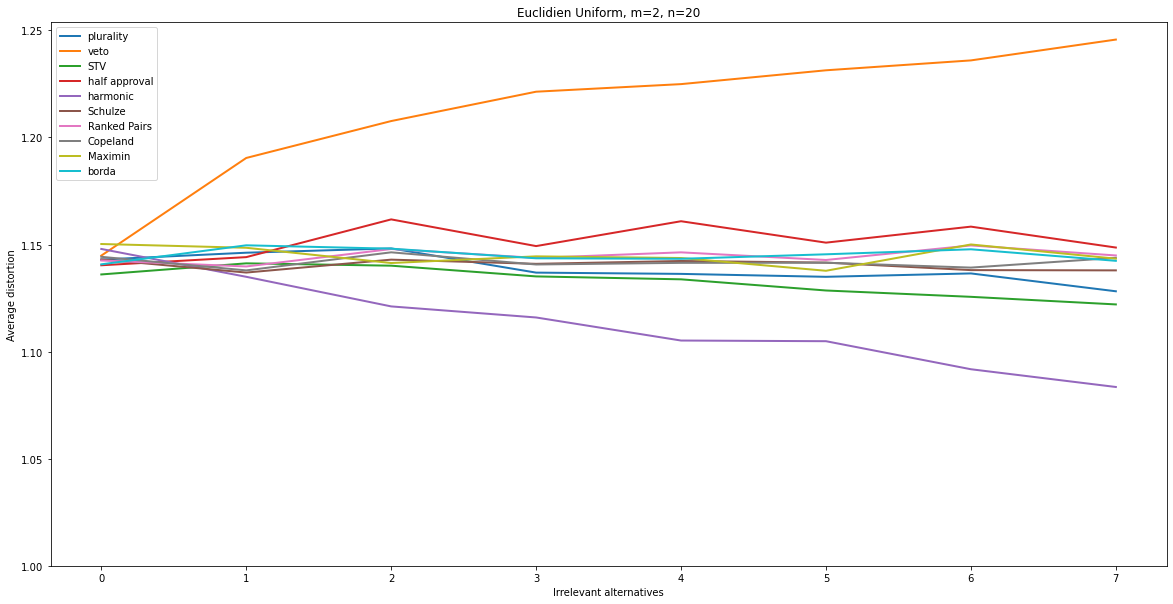

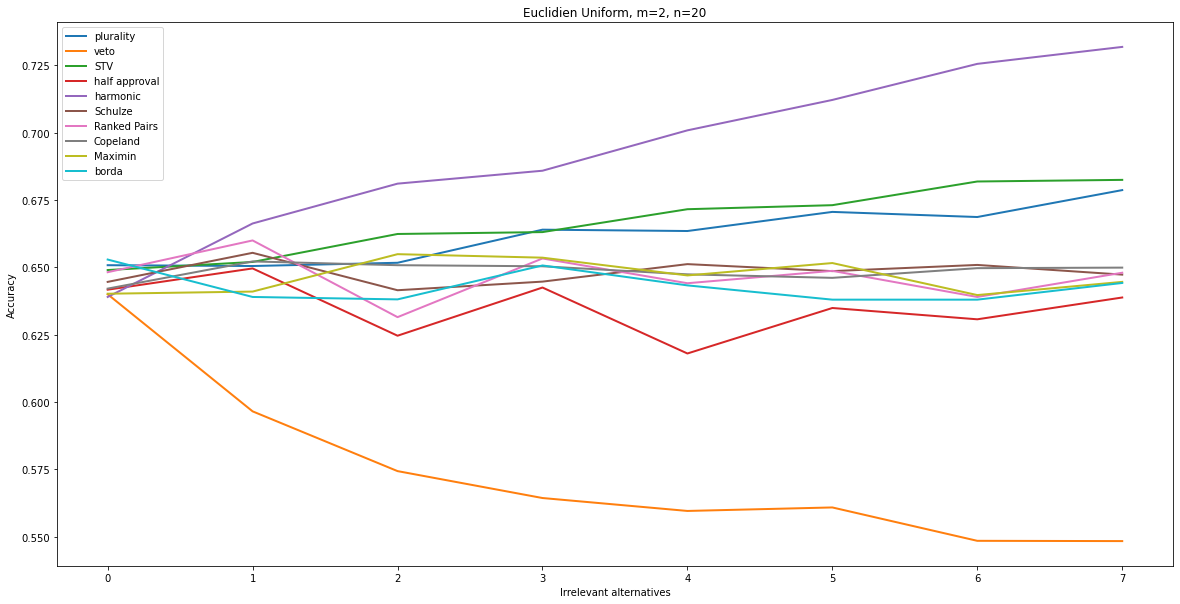

In [8]:
plot_results(max_cand, res_1d, accuracy_1d, n_voters, n_candidates, "Euclidien Uniform")

In [5]:
res_1d =[]
accuracy_1d = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 1000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformEuclidean(dim=1, norm=True))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_1d.append(tab_evol)
    accuracy_1d.append(tab_accuracy)

100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


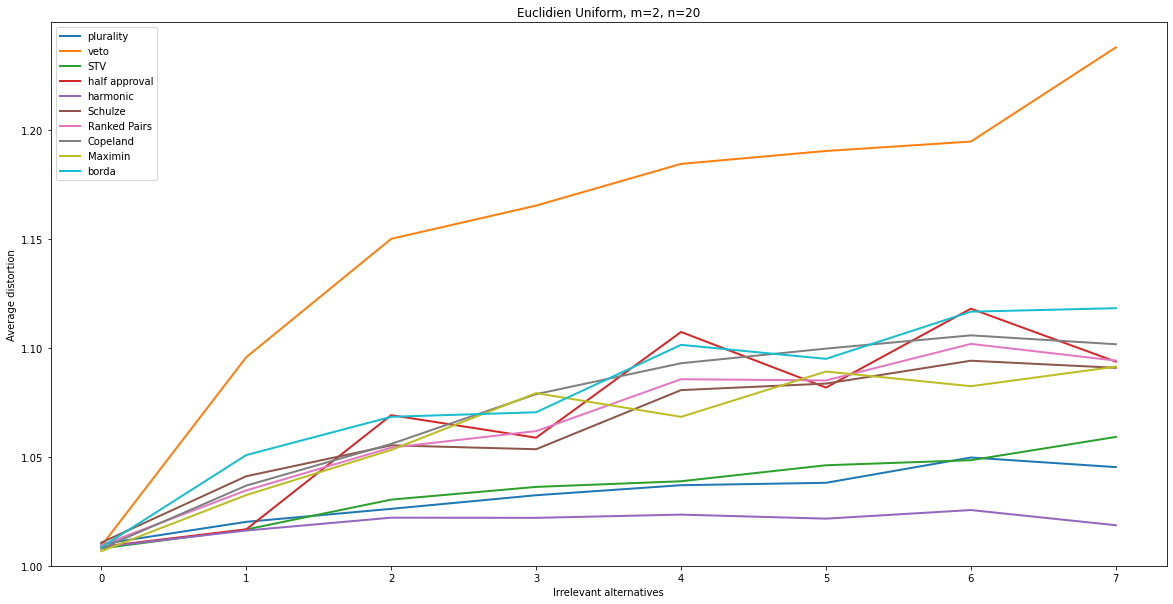

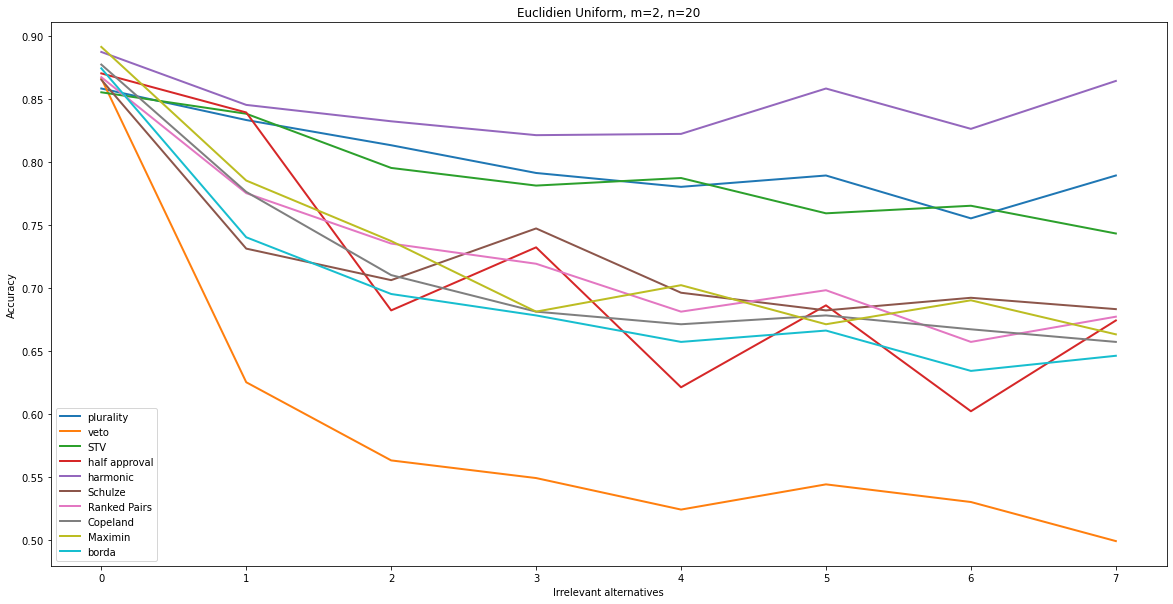

In [6]:
plot_results(max_cand, res_1d, accuracy_1d, n_voters, n_candidates, "Euclidien Uniform")

# Euclidean uniform 2D

In [9]:
res_2d =[]
accuracy_2d = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformEuclidean(dim=2))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_2d.append(tab_evol)
    accuracy_2d.append(tab_accuracy)

100%|██████████| 8/8 [00:57<00:00,  7.21s/it]


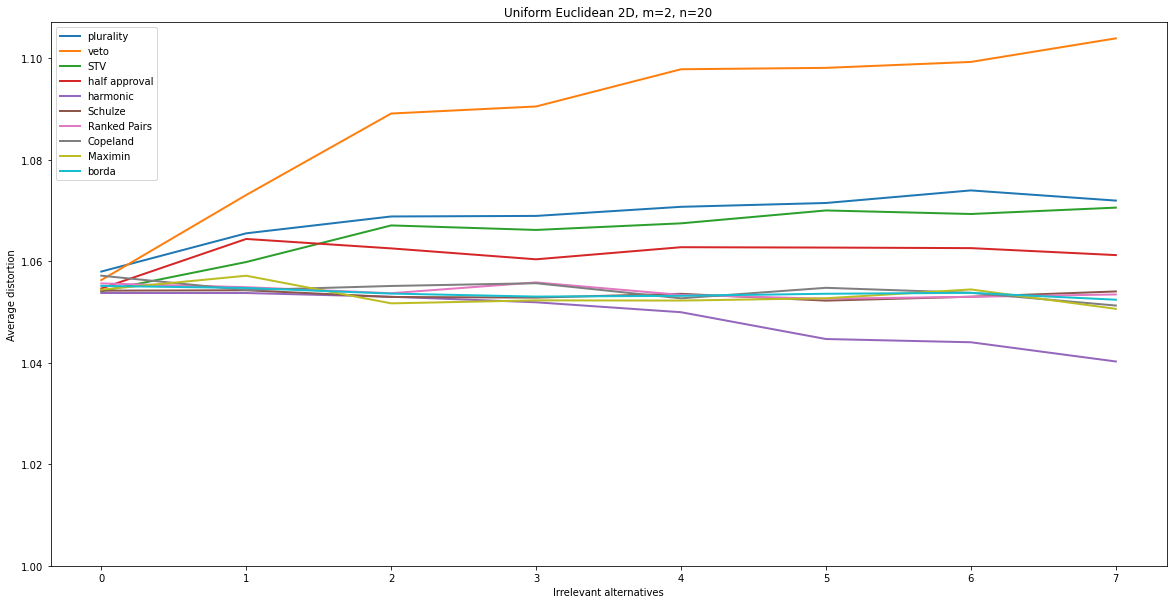

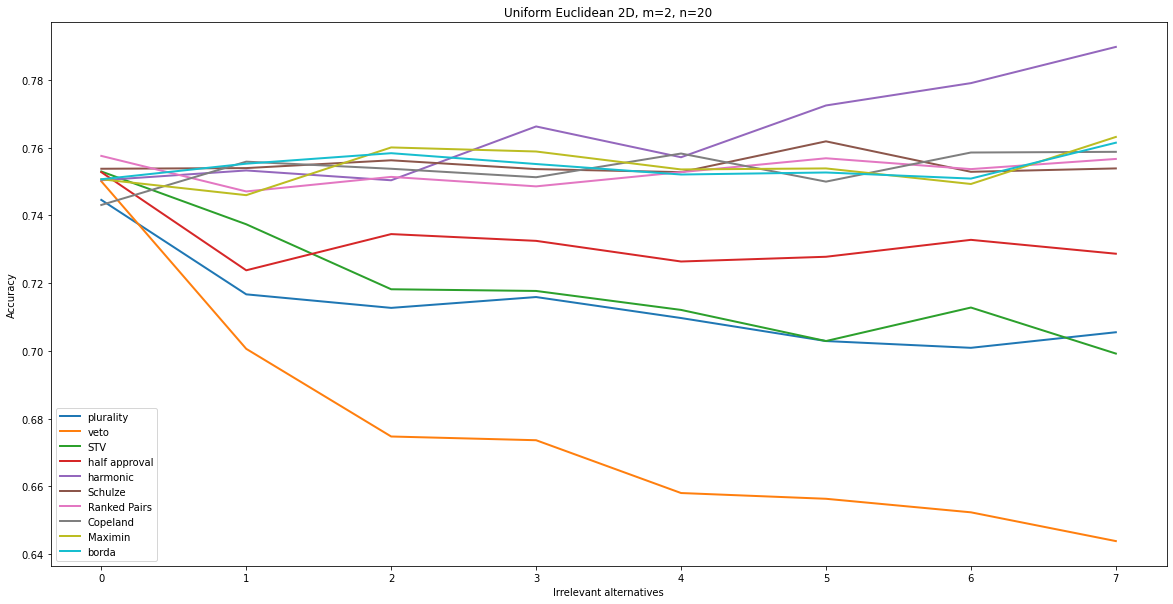

In [10]:
plot_results(max_cand, res_2d, accuracy_2d, n_voters, n_candidates, "Uniform Euclidean 2D")

# Euclidean multiple poles

In [11]:
res_poles =[]
accuracy_poles = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.multiplePolesEuclidean(dim=2))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_poles.append(tab_evol)
    accuracy_poles.append(tab_accuracy)

100%|██████████| 8/8 [01:22<00:00, 10.33s/it]


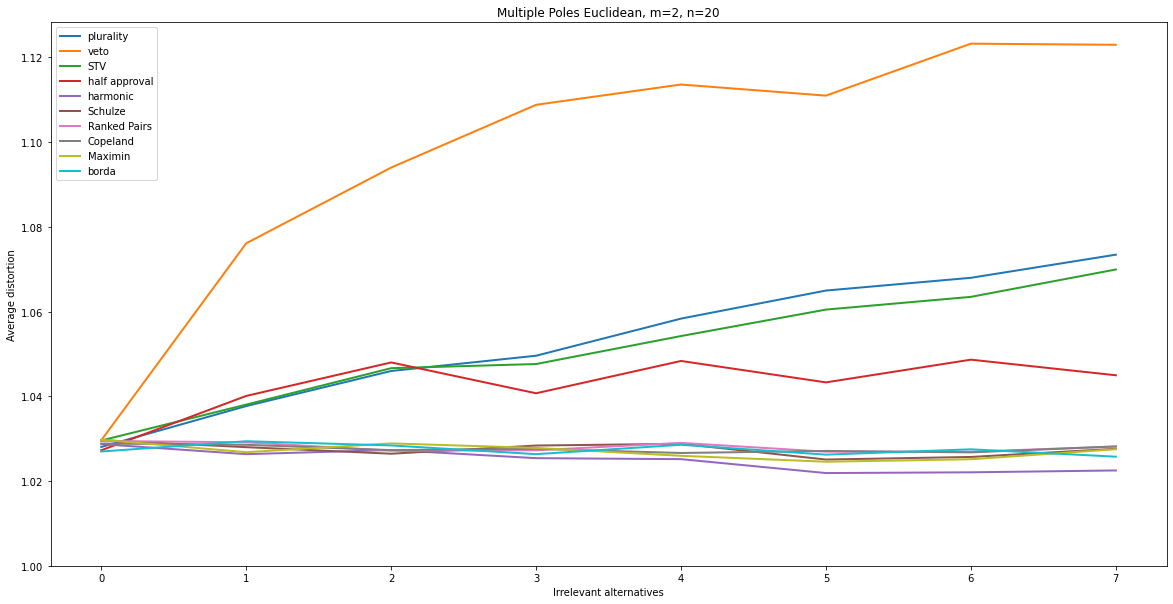

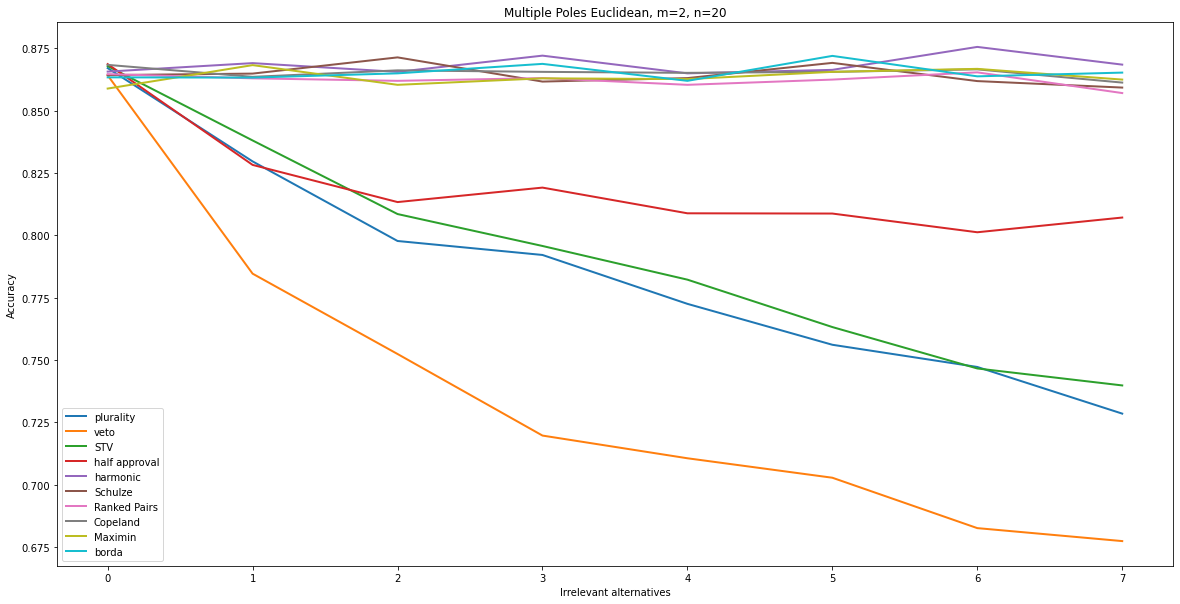

In [12]:
plot_results(max_cand, res_poles, accuracy_poles, n_voters, n_candidates, "Multiple Poles Euclidean")

# Euclidean gaussian 1D

In [13]:
res_gauss_1d =[]
accuracy_gauss_1d = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.gaussianEuclidean(dim=1))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_gauss_1d.append(tab_evol)
    accuracy_gauss_1d.append(tab_accuracy)

100%|██████████| 8/8 [00:55<00:00,  6.88s/it]


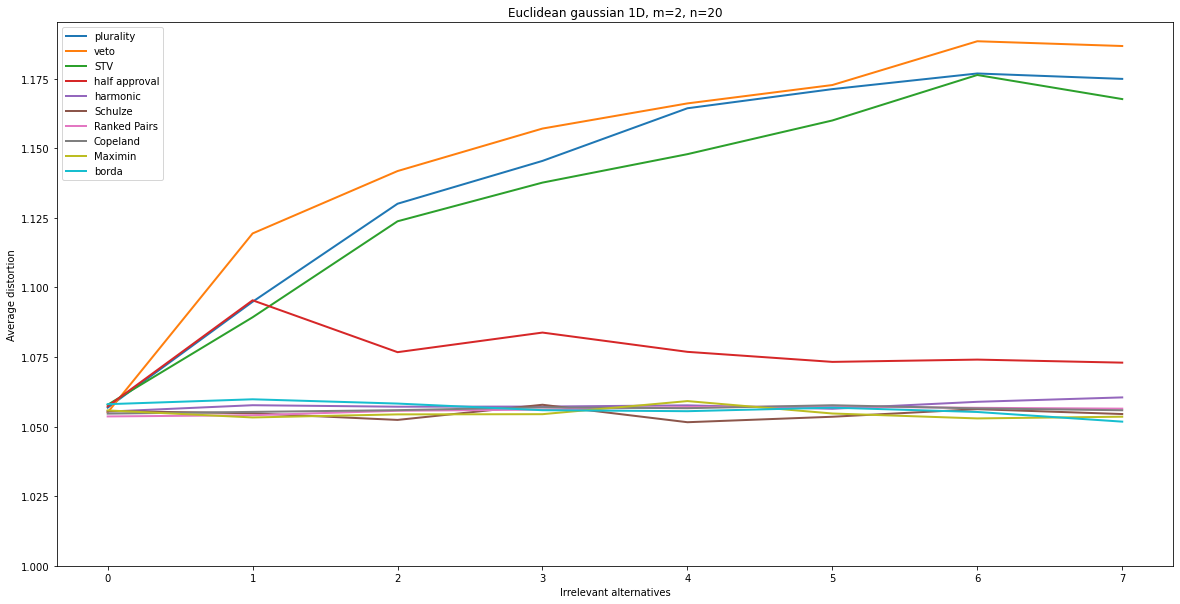

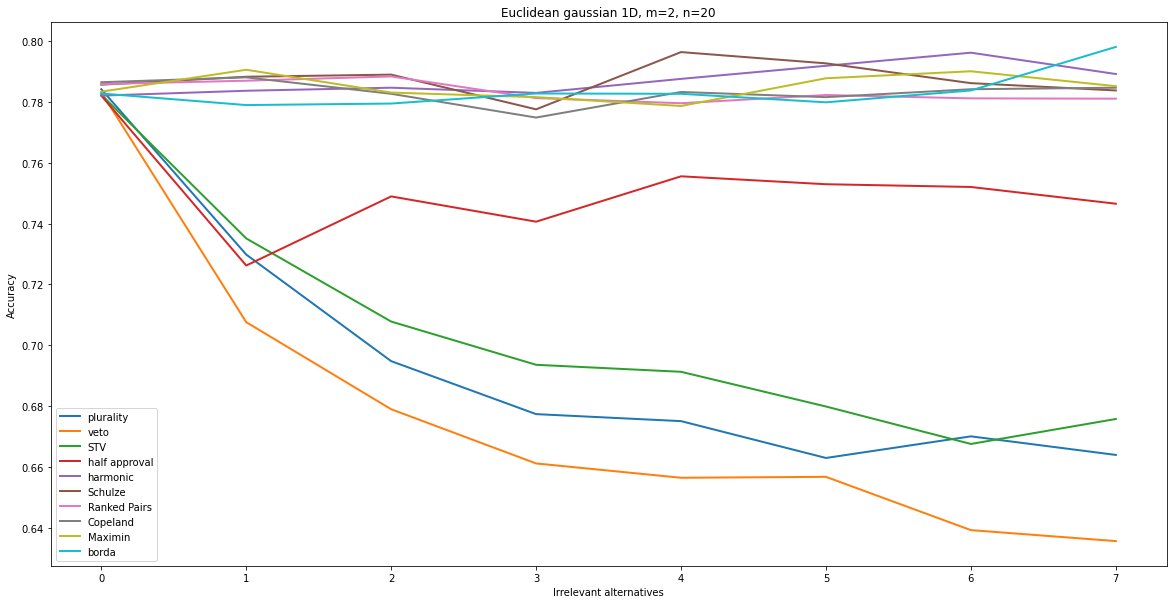

In [14]:
plot_results(max_cand, res_gauss_1d, accuracy_gauss_1d, n_voters, n_candidates, "Euclidean gaussian 1D")

# Euclidean gaussian 2D

In [15]:
res_gauss_2d =[]
accuracy_gauss_2d = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.gaussianEuclidean(dim=2))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res_gauss_2d.append(tab_evol)
    accuracy_gauss_2d.append(tab_accuracy)

100%|██████████| 8/8 [01:01<00:00,  7.73s/it]


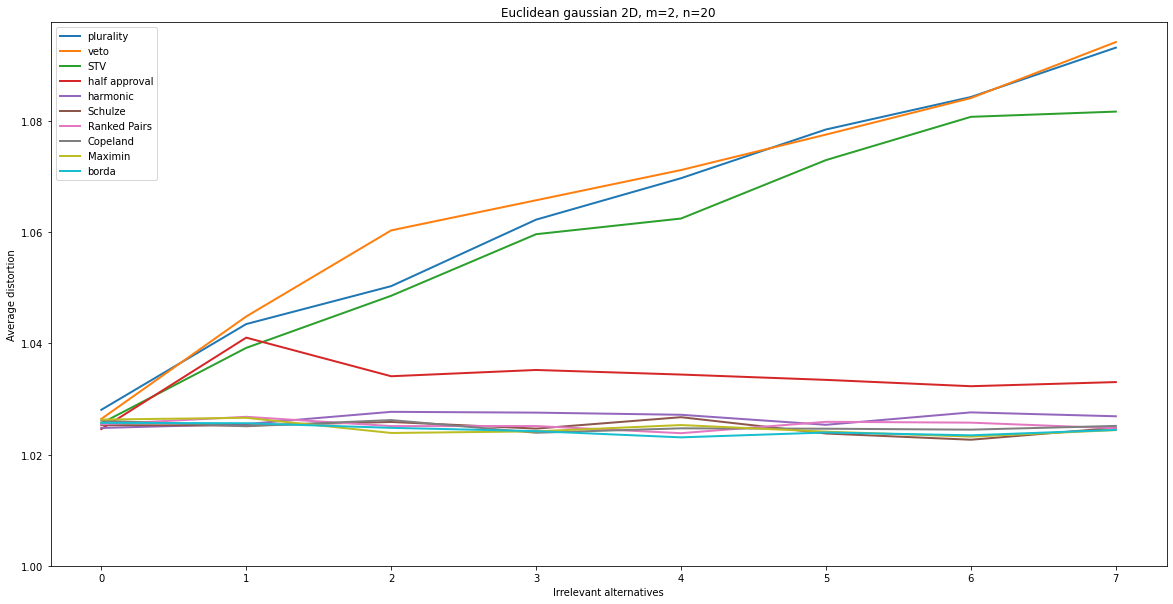

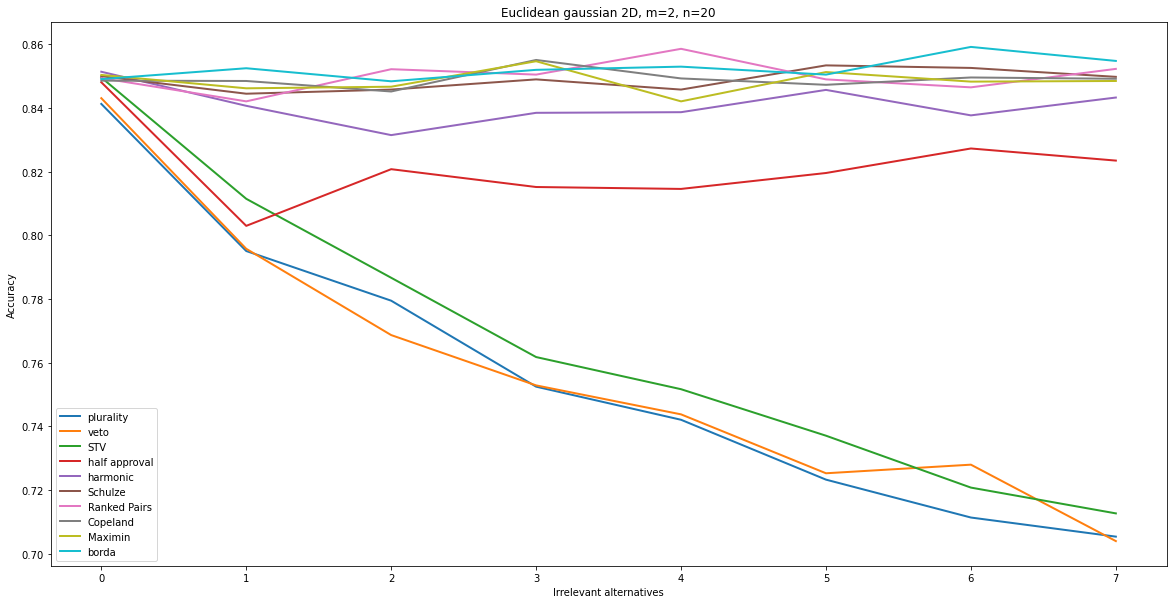

In [16]:
plot_results(max_cand, res_gauss_2d, accuracy_gauss_2d, n_voters, n_candidates, "Euclidean gaussian 2D")

# Gaussian Bimodal

In [3]:
res =[]
n_candidates = 2 # REAL candidates
max_cand = 10 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.gaussianMultimodal(n_peaks=2))
    tab_evol = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.35s/it]


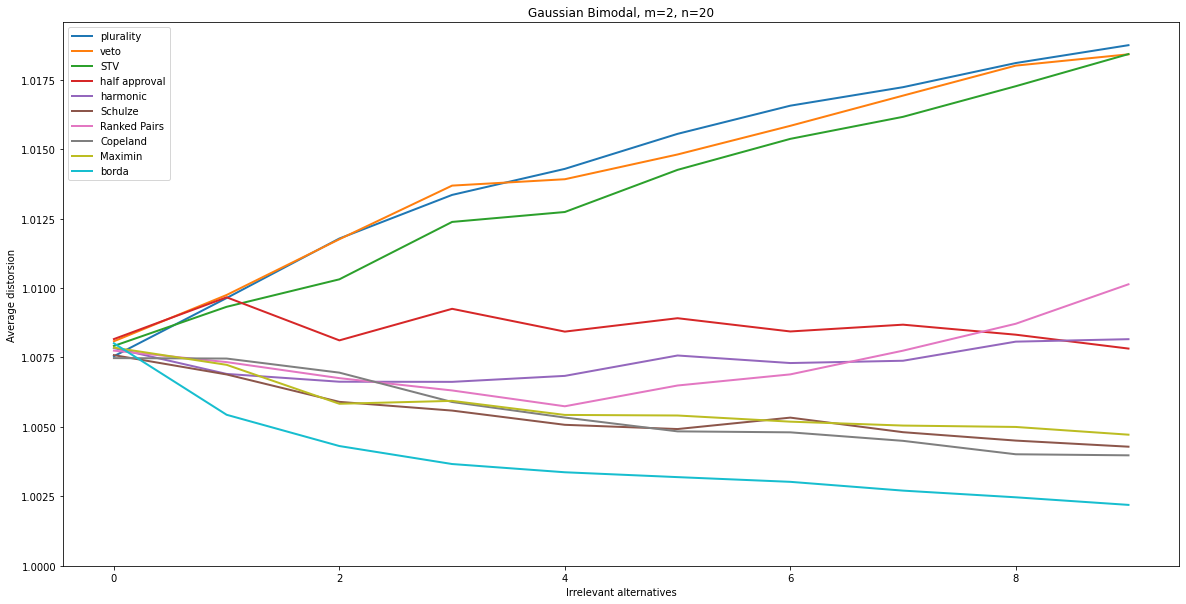

In [5]:
plt.figure(figsize=(20,10))
for j in range(len(rules)):
    plt.plot(range(10), res[j], label=rules[j].name, linewidth=2)
plt.legend()
plt.title("Gaussian Bimodal, m="+str(n_candidates)+", n="+str(n_voters))
plt.xlabel("Irrelevant alternatives")
plt.ylabel("Average distorsion")
plt.ylim(1)
plt.show()

# Gaussian Trimodal

In [6]:
res =[]
n_candidates = 2 # REAL candidates
max_cand = 10 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.gaussianMultimodal(n_peaks=3))
    tab_evol = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.42s/it]


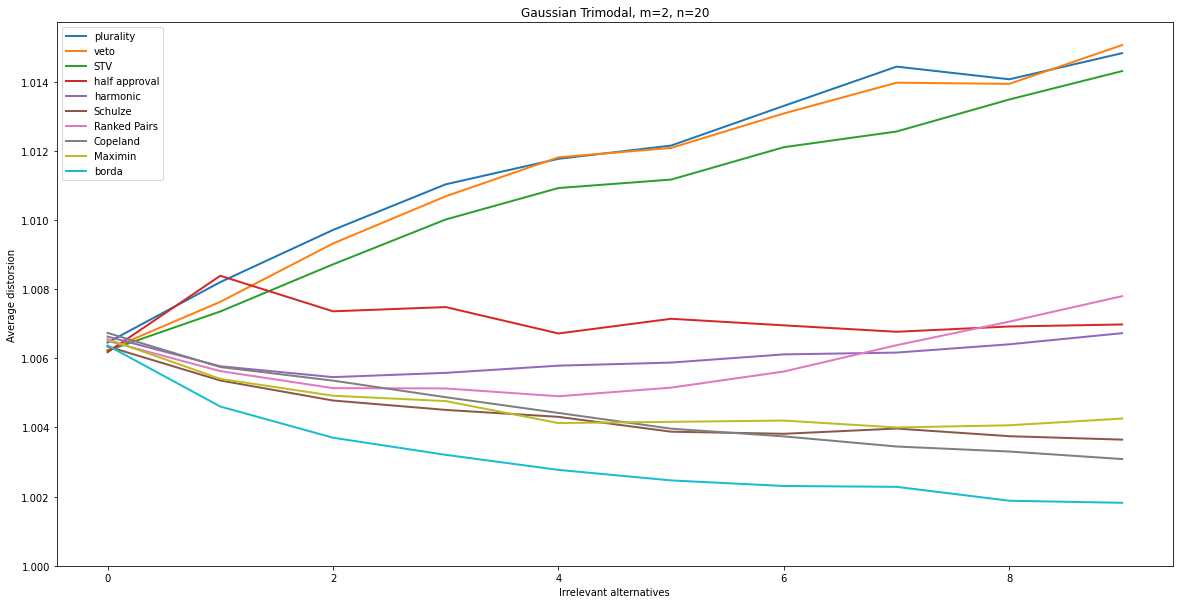

In [7]:
plt.figure(figsize=(20,10))
for j in range(len(rules)):
    plt.plot(range(10), res[j], label=rules[j].name, linewidth=2)
plt.legend()
plt.title("Gaussian Trimodal, m="+str(n_candidates)+", n="+str(n_voters))
plt.xlabel("Irrelevant alternatives")
plt.ylabel("Average distorsion")
plt.ylim(1)
plt.show()